![SolidQ](https://www.solidq.com/wp-content/uploads/2015/06/Logo-SolidQ-Web.gif)
# Analizando los datos del hundimiento del Titanic


A lo largo de este laboratorio analizaremos el conjunto de datos del hundimiento del Titanic. En la [web de Kaggle](https://www.kaggle.com/c/titanic) podremos encontrar más información sobre las diferentes variables que contiene el dataset. 

En esta primera toma de contacto con el Conjunto de Datos nos centraremos en:

 1. Primeros pasos con el dataset
 2. Exploración del dataset y generación de estadísticas
 3. Presentación de resultados

### Cargando el conjunto de datos y obteniendo información básica:
El objetivo de esta sección es que nos familiarizemos con Pandas y seamos capaces de manipular el dataset a nuestro interés.

utilizaremos para este caso el fichero titanic_data.csv

In [0]:
import pandas

input_file = 'titanic_data.csv'
separador = ","
dataset = pandas.read_csv(filepath_or_buffer=input_file, sep=separador)

Ahora que ya tenemos el conjunto de datos cargado en memoria vamos a analizarlo un poco. En esta tarea intenta generar el código necesario para responder a las siguiente preguntas:

 * ¿Cuantas filas y columnas contiene el dataset?
 * ¿Cual es el nombre de las columnas que incluye el dataset?
 * ¿Qué información contiene la primera fila del dataset?¿Y la última?


In [2]:
print "El numero de filas y columnas que incluye el dataset es: ",dataset.shape
print "\nLos nombres de las columnas son: \n",dataset.columns
print "\nLa primera fila del dataset es: \n",dataset.head(1)
print "\nLa última fila del dataset es: \n",dataset.tail(1)

El numero de filas y columnas que incluye el dataset es:  (1045, 12)

Los nombres de las columnas son: 
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

La primera fila del dataset es: 
   PassengerId  Survived  Pclass  ...  Fare Cabin  Embarked
0            1         0       3  ...  7.25   NaN         S

[1 rows x 12 columns]

La última fila del dataset es: 
      PassengerId  Survived  Pclass  ...  Fare Cabin  Embarked
1044         1307         0       3  ...  7.25   NaN         S

[1 rows x 12 columns]


Vamos a operar con nuestro dataset. Por ejemplo vamos a seleccionar las columnas: Name, Sex, Age y las filas de la 3 a la 5:

In [3]:

print "Imprimir las filas 3 a 5 y columnas Name, Sex, Age\n", dataset.loc[[3,4,5],['Name','Sex','Age']]

Imprimir las filas 3 a 5 y columnas Name, Sex, Age
                                           Name     Sex   Age
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0
4                      Allen, Mr. William Henry    male  35.0
5                       McCarthy, Mr. Timothy J    male  54.0


Sin embargo, ahora quiero seleccionar las 4 primeras filas del dataset y la tercera y cuarta columnas:

In [4]:
print "Imprimir las 4 primeras filas y columnas tercera y cuarta\n", dataset.iloc[:4,[2,3]]

Imprimir las 4 primeras filas y columnas tercera y cuarta
   Pclass                                               Name
0       3                            Braund, Mr. Owen Harris
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2       3                             Heikkinen, Miss. Laina
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)


Perfecto!, ya sabemos seleccionar filas y columnas!, ahora el objetivo es hacer modificaciones. Por ejemplo cambiemos a Allen, Mr. William Henry su edad (actualmente 54 años) por 260. Para ello tendremos que seleccionar la fila en la que la columna 'Name' sea igual a 'Allen, Mr. William Henry', de la siguiente manera:

Para modificar este valor, tendremos que asignarle el que queremos (260):

In [5]:
# Asignar nueva edad al pobre Allen:
print "Edad de Allen, Mr. William Henry:\n ", dataset.loc[dataset['Name'].isin(['Allen, Mr. William Henry']),'Age']
dataset.loc[dataset['Name']=='Allen, Mr. William Henry','Age'] = 260


Edad de Allen, Mr. William Henry:
  4    35.0
Name: Age, dtype: float64


¿Cual es ahora la edad de Allen?

In [6]:
print "La nueva edad de Allen, Mr. William Henry:\n ", dataset.loc[dataset['Name']=='Allen, Mr. William Henry','Age']

La nueva edad de Allen, Mr. William Henry:
  4    260.0
Name: Age, dtype: float64


Como vemos, ya hemos editado su edad!. Aunque le devolveremos a los 54 años, a estas alturas ya sabemos seleccionar subsets de datos y editarlos si lo necesitamos.

In [0]:
# Devolvamos a Allen su edad:
dataset.loc[dataset['Name']=='Allen, Mr. William Henry','Age'] = 35

### Exploración del dataset y generación de estadísticas
¿Qué sabemos por ahora de nuestros datos? Practicamente nada!. Vamos a utilizar una serie de funciones que se incluyen en Pandas para obtener facilmente valiosa información de los mismos. 

El primera información que se ha de obtener cuando por primera vez se trabaja con un dataset es la cantidad de ```NAN``` incluidos en el mismo, para ello utilizaremos la función ```.info()``` de Pandas:

In [9]:
# Obtener información sobre el número de valores NAN que se incluyen en el dataset:
print dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 12 columns):
PassengerId    1045 non-null int64
Survived       1045 non-null int64
Pclass         1045 non-null int64
Name           1045 non-null object
Sex            1045 non-null object
Age            1045 non-null float64
SibSp          1045 non-null int64
Parch          1045 non-null int64
Ticket         1045 non-null object
Fare           1045 non-null float64
Cabin          272 non-null object
Embarked       1043 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 98.0+ KB
None


¿Qué columnas incluyen valores nulos?: Cabin incluye 272 valores no NAN y Embarked 2 NANs

OK OK, vamos a empezar a mirar el dataset de manera que podamos responder a nuestra pregunta principal: ¿Qué factores influyeron en la supervivencia del Titanic?

Pues bien, Pandas incluye la función ```.describe()``` la cual permite obtener estadísticas básicas sobre las distintas columans del dataset: 

In [10]:
print "Imprimir estadísticas básicas del dataset: \n", dataset.describe()

Imprimir estadísticas básicas del dataset: 
       PassengerId     Survived  ...        Parch         Fare
count  1045.000000  1045.000000  ...  1045.000000  1045.000000
mean    654.990431     0.399043  ...     0.421053    36.686080
std     377.650551     0.489936  ...     0.840052    55.732533
min       1.000000     0.000000  ...     0.000000     0.000000
25%     326.000000     0.000000  ...     0.000000     8.050000
50%     662.000000     0.000000  ...     0.000000    15.750000
75%     973.000000     1.000000  ...     1.000000    35.500000
max    1307.000000     1.000000  ...     6.000000   512.329200

[8 rows x 7 columns]


Aquí ya tenemos información útil!!!, ya podemos responder a las siguientes preguntas:
 * ¿Qué porcentaje de supervivientes hubo? %
 * ¿Cual era la media de edad? 
 * ¿Cual fue el ticket (Fare) más caro pagado?¿Y el que menos?  y 
 * ¿Cuantas clases (Pclass) incluye el barco?

No echais de menos una columna? 'Sex' no esta incluida en este análisis, porque? Si os fijais en la información de ```.info()``` aquí solo se han incluido las columnas numéricas (float o int64). vamos a echar un vistazo a 'Sex' para entender el formato que tiene:

In [11]:
print dataset.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


Como vemos "male" y "female" son los valores incluidos, comprobemos que estos son los únicos valores que se incluyen para todo el dataset

In [12]:
# Imprimimos todos los valores de Sex en el dataset:
print dataset.Sex.unique()

['male' 'female']


Como este formato nos impide trabajar con la función ```.describe()```, vamos a transformar esta columna en otros valores que nos sean de más utilidad. 

In [0]:
# definir functión que haga el cambio:
def gender_number(gender):
    if gender == 'male': return 0.
    return 1.

# Aplicar el cambio a todas las filas con la función Apply:
dataset.Sex = dataset.Sex.apply(lambda x:gender_number(x))

¿Que aspecto tiene ahora 'Sex'?

In [14]:
# Imprimimos todos los valores de Sex en el dataset:
print dataset.Sex.unique()

[0. 1.]


Bien!, ejecutemos ahora ```.describe()``` de nuevo sobre la columna 'Sex'

In [15]:
# Obtengamos estadísticas de 'Sex'
print dataset.Sex.describe()

count    1045.000000
mean        0.371292
std         0.483382
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Sex, dtype: float64


Vaya, parece que no ayuda a entender como están distribuidos los sexos? Parece que no.

In [16]:
# Obtener el recuento de hombres y mujeres en el barco:
print dataset.groupby('Sex').count().iloc[:,1]

Sex
0.0    657
1.0    388
Name: Survived, dtype: int64


¿Cuantos hombres y mujeres había? 388 mujeres y 657 hombres

Hagamos una cosa ahora, con el objetivo de entender como están distribuidos los pasajeros por edades vamos a crear una nueva columna llamada 'Age_ranges' que incluya el rango de edad a la que cada pasajero corresponde. El objetivo será obtener cuantos pasajeros hay en el rango [0-10), [10,20) .... 

In [18]:
import numpy as np
# Function para generar los rangos de edad:
def age_ranges(x):
    return '[{0}-{1})'.format(10*int(x/10), 10 +10*int(x/10))

# Crear nueva columna:
dataset['Age_ranges'] = np.nan

# Asignar los valores rangos de edad correspondientes:
dataset['Age_ranges'] = dataset.Age.apply(lambda x: age_ranges(x))

# Comprobar que las cosas funcionan como se espera:
print dataset[['Age_ranges','Age']].head(10)

  Age_ranges   Age
0    [20-30)  22.0
1    [30-40)  38.0
2    [20-30)  26.0
3    [30-40)  35.0
4    [30-40)  35.0
5    [50-60)  54.0
6     [0-10)   2.0
7    [20-30)  27.0
8    [10-20)  14.0
9     [0-10)   4.0


¿Cómo están distribuidos los pasajeros por rangos de edad en el barco?

In [19]:
# Imprimir distribución de rangos de edad en el barco:
print dataset.groupby('Age_ranges').count().iloc[:,1]

Age_ranges
[0-10)      82
[10-20)    143
[20-30)    344
[30-40)    232
[40-50)    135
[50-60)     70
[60-70)     31
[70-80)      7
[80-90)      1
Name: Survived, dtype: int64


¿Cuantos niños menores de 10 años hay incluidos? 82

Y ahora... ¿Quien sabría decir como están distribuidos los pasajeros por edades y sexos?

In [20]:
# Imprimir distribución de rangos de edad en el barco por sexo:
print dataset.groupby(['Sex','Age_ranges']).count().iloc[:,1]


Sex  Age_ranges
0.0  [0-10)         43
     [10-20)        79
     [20-30)       229
     [30-40)       146
     [40-50)        89
     [50-60)        43
     [60-70)        21
     [70-80)         6
     [80-90)         1
1.0  [0-10)         39
     [10-20)        64
     [20-30)       115
     [30-40)        86
     [40-50)        46
     [50-60)        27
     [60-70)        10
     [70-80)         1
Name: Survived, dtype: int64


Creo que llegados a este punto, ya no deberíamos tener problemas en sacar los factores que influyeron en la supervivencia de los pasajeros en el Titanic. Por ejemplo, ¿como se distribuyen los supervivientes por sexo?, ¿y por edades, clase, precio del billete, etc?

In [21]:
# Distribución de supervivientes por edades:
print dataset.groupby(['Survived','Age_ranges']).count().iloc[:,1]
# Distribución de supervivientes por sexo:
print dataset.groupby(['Survived','Sex']).count().iloc[:,1]
# Distribución de supervivientes por clase:
print dataset.groupby(['Survived','Pclass']).count().iloc[:,1]

Survived  Age_ranges
0         [0-10)         35
          [10-20)        83
          [20-30)       224
          [30-40)       133
          [40-50)        87
          [50-60)        41
          [60-70)        19
          [70-80)         6
1         [0-10)         47
          [10-20)        60
          [20-30)       120
          [30-40)        99
          [40-50)        48
          [50-60)        29
          [60-70)        12
          [70-80)         1
          [80-90)         1
Name: Pclass, dtype: int64
Survived  Sex
0         0.0    564
          1.0     64
1         0.0     93
          1.0    324
Name: Pclass, dtype: int64
Survived  Pclass
0         1         114
          2         149
          3         365
1         1         170
          2         112
          3         135
Name: Name, dtype: int64


Bueno, ya tenemos el número de pasajeros que sobrevivieron por edad, sexo y clase, pero lo ideal (y esperado) es tener el porcentage de supervivencia por edad, sexo, clase, etc. 

Por ejemplo, el porcentaje de superviviencia por edades lo podemos calcular de la siguiente manera:

**NOTA**: Un pasajero que sobrevive tiene valor 1, con lo cual, si sobreviven 5 pasajeros de 10, la media será igual al porcentaje de supervivencia.

In [22]:
# Porcentaje de supervivientes por edad:
print dataset.groupby('Age_ranges').mean().loc[:,'Survived']


Age_ranges
[0-10)     0.573171
[10-20)    0.419580
[20-30)    0.348837
[30-40)    0.426724
[40-50)    0.355556
[50-60)    0.414286
[60-70)    0.387097
[70-80)    0.142857
[80-90)    1.000000
Name: Survived, dtype: float64


OK, ¿Cuales son los porcentajes de superviviencia por edades, edades y sexos, y demás combinaciones que se te ocurran? 

In [23]:
# Porcentaje de supervivientes por Sexo:
print dataset.groupby('Sex').mean().loc[:,'Survived']
# Porcentaje de supervivientes por Pclass:
print dataset.groupby('Pclass').mean().loc[:,'Survived']
# Porcentaje de supervivientes por Sexo y edad:
print dataset.groupby(['Sex','Age_ranges']).mean().loc[:,'Survived']
# Porcentaje de supervivientes por Sexo y Pclass:
print dataset.groupby(['Sex','Pclass']).mean().loc[:,'Survived']
# Porcentaje de supervivientes por Sexo y Age_ranges:
print dataset.groupby(['Pclass','Age_ranges']).mean().loc[:,'Survived']

Sex
0.0    0.141553
1.0    0.835052
Name: Survived, dtype: float64
Pclass
1    0.598592
2    0.429119
3    0.270000
Name: Survived, dtype: float64
Sex  Age_ranges
0.0  [0-10)        0.441860
     [10-20)       0.088608
     [20-30)       0.109170
     [30-40)       0.157534
     [40-50)       0.134831
     [50-60)       0.093023
     [60-70)       0.095238
     [70-80)       0.000000
     [80-90)       1.000000
1.0  [0-10)        0.717949
     [10-20)       0.828125
     [20-30)       0.826087
     [30-40)       0.883721
     [40-50)       0.782609
     [50-60)       0.925926
     [60-70)       1.000000
     [70-80)       1.000000
Name: Survived, dtype: float64
Sex  Pclass
0.0  1         0.264901
     2         0.094937
     3         0.109195
1.0  1         0.977444
     2         0.941748
     3         0.638158
Name: Survived, dtype: float64
Pclass  Age_ranges
1       [0-10)        0.500000
        [10-20)       0.772727
        [20-30)       0.673077
        [30-40)       0.694444


Ahora si!, ¿Que factores influyeron principalmente en la supervivencia de los pasajeros?
*  Sexo
*  Clase
*  Edad

### Presentación de resultados
Es muy importante no sólo saber analizar los datos con los que se trabaja y obtener conclusiones, sino también comunicar de una manera efectiva y clara los resultados a los usuarios para que estos puedan entender las conclusiones y el trabajo realizado. Por esta razón, vamos a practicar con una serie de gráficas que sirvan para representar de una manera clara y contundente los resultados de nuestro analisis.

El primer tipo de gráficas que vamos a generar será para describir las variables que incluye el dataset, por ejemplo representar como se distribuyen los pasajeros por clases, por sexos, por edades....

In [0]:
# Devolvamos el campo gender a sus valores originales....
# definir functión que haga el cambio:
def numbertogender(gender):
    if gender == 0.: return 'male'
    return 'female'

# Aplicar el cambio a todas las filas con la función Apply:
dataset.Sex = dataset.Sex.apply(lambda x:numbertogender(x))

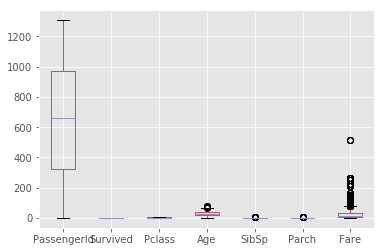

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# Seleccionamos el estilo de las gráficas:
plt.style.use('ggplot')

# Generamos el Boxplot:
dataset.boxplot(return_type='axes')

# Representamos la gráfica:
plt.show()




¿Qué podemos conclusiones podemos sacar a partir de esta representación?
* Mediana (rojo)
* Primer y tercer quartil
* Outliers

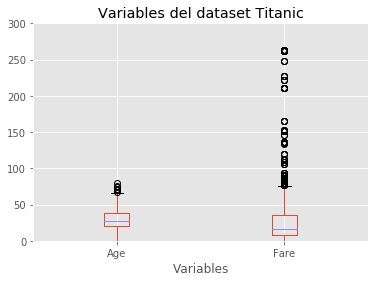

In [26]:
# Generamos el Boxplot, quitando la columna 'PassengerId','Survived','Pclass','SibSp','Parch':
dataset.loc[:,~dataset.columns.isin(['PassengerId','Survived','Pclass','SibSp','Parch'])].boxplot(return_type='axes')

# Añadimos título y etiquetas:
plt.title('Variables del dataset Titanic')
plt.xlabel('Variables')
plt.ylim([0,300])

# Representamos la gráfica:
plt.show()

¿Cómo se genera un historgrama de cualquier variable?, A continuación muestro como se genera el histograma de la columna 'Age':

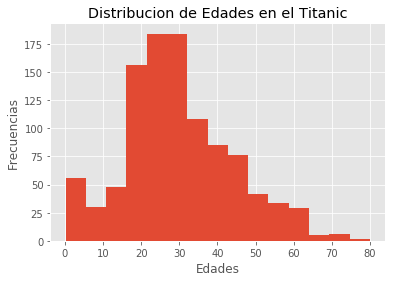

In [27]:
# Generamos el histograma de Age:
dataset.loc[:,'Age'].hist(bins=15)

# Añadimos título y etiquetas:
plt.title('Distribucion de Edades en el Titanic')
plt.xlabel('Edades')
plt.ylabel('Frecuencias')

# Representamos la gráfica:
plt.show()


¿Podrías generar un histograma para la columna ```Fare```?

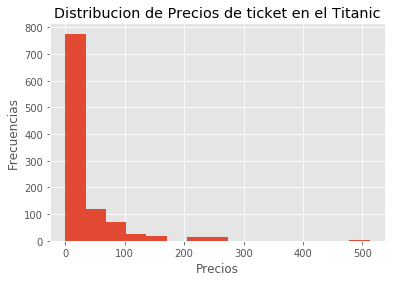

In [28]:
# Generamos el histograma de Fare:
dataset.loc[:,'Fare'].hist(bins=15)

# Añadimos título y etiquetas:
plt.title('Distribucion de Precios de ticket en el Titanic')
plt.xlabel('Precios')
plt.ylabel('Frecuencias')

# Representamos la gráfica:
plt.show()


¿Podriamos ver como se distribuyen los pasajeros por edades y por otra variable (género, supervivencia, clase....)? 

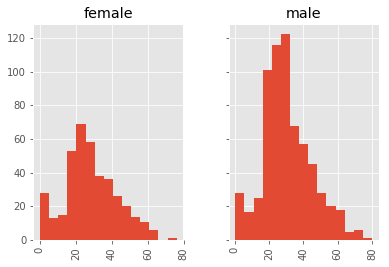

In [29]:
# Generamos el histograma de Age por Sex:
dataset.loc[:,['Age','Sex']].hist(bins=15,by='Sex',sharey=True)

# Representamos la gráfica:
plt.show()


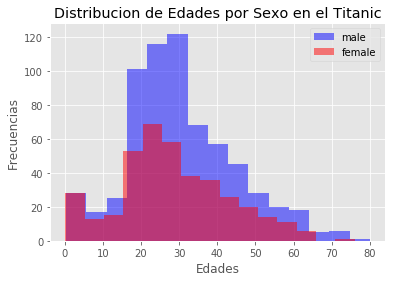

In [30]:
#Otra opción
# Generamos el histograma de Age por Sex:
dataset.loc[dataset.Sex=='male','Age'].hist(bins=15,color='blue',alpha=0.5,label='male')
dataset.loc[dataset.Sex=='female','Age'].hist(bins=15,color='red',alpha=0.5,label='female')

# Añadimos título y etiquetas:
plt.title('Distribucion de Edades por Sexo en el Titanic')
plt.xlabel('Edades')
plt.ylabel('Frecuencias')
plt.legend()

# Representamos la gráfica:
plt.show()

¿Cómo se distribuyen los pasajeros por edad y por clase? (selecciones [colores](http://html-color-codes.info/) para cada una de las clases)

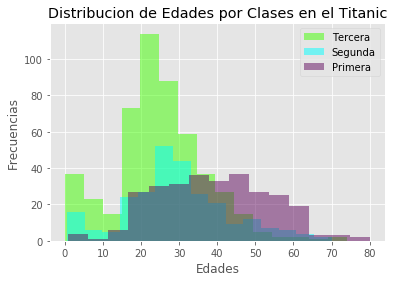

In [31]:
# Generamos el histograma de Age por clase:
dataset.loc[dataset.Pclass==3,'Age'].hist(bins=15,color='#40FF00',alpha=0.5,label='Tercera')
dataset.loc[dataset.Pclass==2,'Age'].hist(bins=15,color='#00FFFF',alpha=0.5,label='Segunda')
dataset.loc[dataset.Pclass==1,'Age'].hist(bins=15,color='#610B5E',alpha=0.5,label='Primera')

# Añadimos título y etiquetas:
plt.title('Distribucion de Edades por Clases en el Titanic')
plt.xlabel('Edades')
plt.ylabel('Frecuencias')
plt.legend()

# Representamos la gráfica:
plt.show()

Ahora vamos a empezar a generar gráficas para demostrar como se distribuyen los supervivientes por Sexo, Clase y Edad. Antes vimos que esta información la obteniamos haciendo agrupaciones sobre el dataset. En este caso repetiremos el proceso y lo representaremos, por ejemplo el siguiente proceso muestra como se distribuyen los pasajeros por sexo y los porcentajes de superviviencia asociados a los mismos:

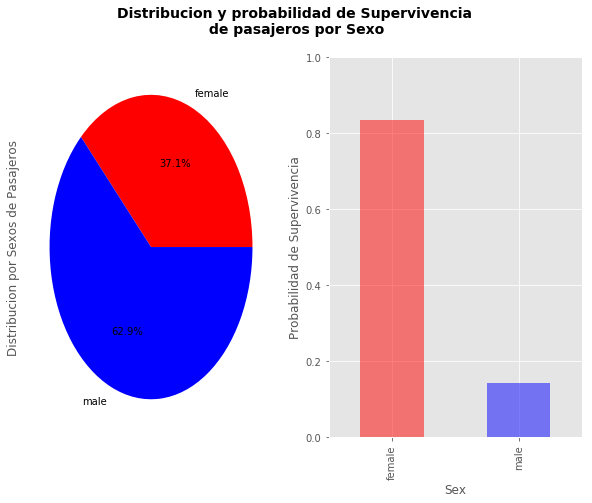

In [32]:
# Vamos a crear una figura con dos subplots:
f, axarr = plt.subplots(1,2,figsize=(10,7))
f.suptitle('Distribucion y probabilidad de Supervivencia\n de pasajeros por Sexo', fontsize=14, fontweight='bold')

# En la gráfica de la izquierda vamos a representar la cantidad de pasajeros por Sexo
dataset.groupby('Sex').count().iloc[:,1].plot.pie(ax=axarr[0],colors=['red','blue'],autopct='%1.1f%%')
axarr[0].set_ylabel('Distribucion por Sexos de Pasajeros')

# En la gráfica de la derecha vamos a representar la probabilidad de superviviencia por Sexo
dataset.groupby('Sex').mean().iloc[:,1].plot.bar(ax=axarr[1],color=['red','blue'],alpha=0.5)
axarr[1].set_ylabel('Probabilidad de Supervivencia')
axarr[1].set_ylim([0,1])

plt.show()




¿Podriamos hacer lo mismo con 'Age_ranges' o 'Pclass'?

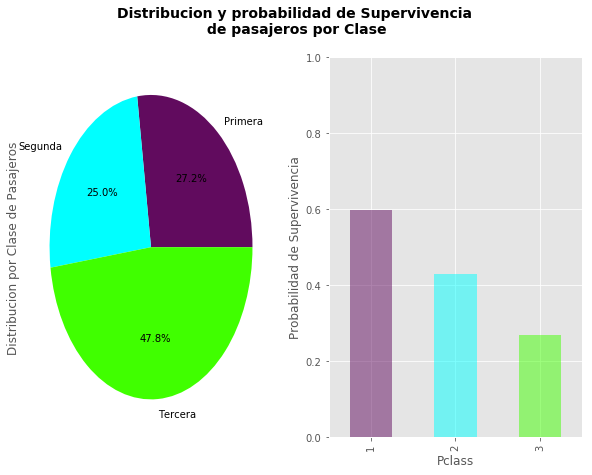

In [33]:
# Vamos a crear una figura con dos subplots:
f, axarr = plt.subplots(1,2,figsize=(10,7))
f.suptitle('Distribucion y probabilidad de Supervivencia\n de pasajeros por Clase', fontsize=14, fontweight='bold')

# En la gráfica de la izquierda vamos a representar la cantidad de pasajeros por Clase
dataset.groupby('Pclass').count().iloc[:,1].plot.pie(ax=axarr[0],labels=['Primera','Segunda','Tercera']\
                                                     ,autopct='%1.1f%%',colors=['#610B5E','#00FFFF','#40FF00'])
axarr[0].set_ylabel('Distribucion por Clase de Pasajeros')

# En la gráfica de la derecha vamos a representar la probabilidad de superviviencia por Clase
dataset.groupby('Pclass').mean().iloc[:,1].plot.bar(ax=axarr[1],color=['#610B5E','#00FFFF','#40FF00']\
                                                    ,alpha=0.5)
axarr[1].set_ylabel('Probabilidad de Supervivencia')
axarr[1].set_ylim([0,1])

plt.show()


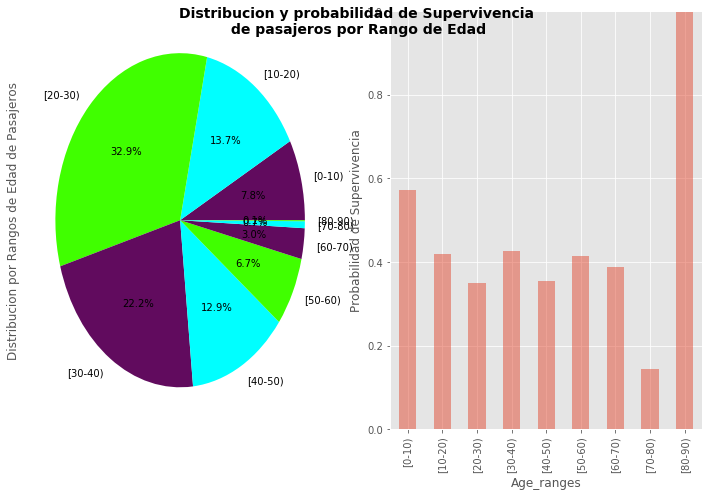

In [34]:
# Vamos a crear una figura con dos subplots:
f, axarr = plt.subplots(1,2,figsize=(10,7))
f.suptitle('Distribucion y probabilidad de Supervivencia\n de pasajeros por Rango de Edad', fontsize=14, fontweight='bold')

# En la gráfica de la izquierda vamos a representar la cantidad de pasajeros por Sexo
dataset.groupby('Age_ranges').count().iloc[:,1].plot.pie(ax=axarr[0],autopct='%1.1f%%',colors=['#610B5E','#00FFFF','#40FF00'])
axarr[0].set_ylabel('Distribucion por Rangos de Edad de Pasajeros')

# En la gráfica de la derecha vamos a representar la probabilidad de superviviencia por Sexo
dataset.groupby('Age_ranges').mean().iloc[:,1].plot.bar(ax=axarr[1],alpha=0.5)
axarr[1].set_ylabel('Probabilidad de Supervivencia')
axarr[1].set_ylim([0,1])

f.tight_layout()
plt.show()


Por último, vamos a comprobar como se distribuye la probabilidad de supervivencia por Sexo y por Clase, para ello. Utiliza pivot_table.

In [35]:
# Este es el dataframe que vamos a representar:
print dataset.groupby(['Sex','Pclass']).mean().reset_index().pivot(index='Pclass',columns='Sex',values='Survived')

Sex       female      male
Pclass                    
1       0.977444  0.264901
2       0.941748  0.094937
3       0.638158  0.109195


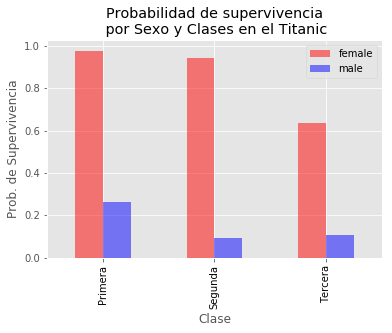

In [36]:
dataset.groupby(['Sex','Pclass']).mean().reset_index().pivot(
    index='Pclass',columns='Sex',values='Survived').plot.bar(color=['red','blue'],alpha=0.5)

# Añadimos título y etiquetas:
plt.title('Probabilidad de supervivencia\n por Sexo y Clases en el Titanic')
plt.xlabel('Clase')
plt.ylabel('Prob. de Supervivencia')
plt.xticks(range(3), ['Primera', 'Segunda', 'Tercera'], color='black')
plt.legend()

plt.show()


Felicidades!, llegados a este punto ya hemos representado visualemente las conclusiones que obtuvimos en un primer momento. Hemos demostrado que la probabilidad de superviviencia viene mayormente determinada por el Sexo, Clase y en menor medida por la Edad (y probablemente sea también factor de otras variables que no hemos analizado en este ejercicio